## **IDS 506 VUMC** 

In [108]:
import pandas as pd
from matplotlib import pyplot as plt

df = pd.read_excel('data.xlsx')
df

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2012-09-10,Mon,33,49,68,71,82,84,86,86,86,86,91,97,101,103,109,110,118
241,2012-09-11,Tue,31,56,68,70,74,78,78,78,78,80,88,94,97,98,98,99,108
242,2012-09-12,Wed,39,49,69,78,81,82,82,82,85,88,96,99,99,100,104,115,121
243,2012-09-13,Thu,34,51,68,77,75,75,75,79,89,92,98,99,99,97,101,106,114


#### ACTUAL DATA PLOT

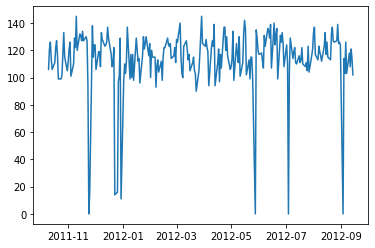

In [109]:
x = df['SurgDate']
y = df['Actual']

plt.plot(x,y)
plt.show()

#### DATE and ACTUAL VALUES

In [110]:
data = df[['SurgDate','Actual']]
data

,SurgDate,Actual
0,2011-10-10,106
1,2011-10-11,121
2,2011-10-12,126
3,2011-10-13,114
4,2011-10-14,106
...,...,...
240,2012-09-10,118
241,2012-09-11,108
242,2012-09-12,121
243,2012-09-13,114


#### MEAN AND VARIANCE

In [111]:
X = data['Actual'].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=112.221311, mean2=116.723577
variance1=562.483808, variance2=471.712208


#### PLOTS

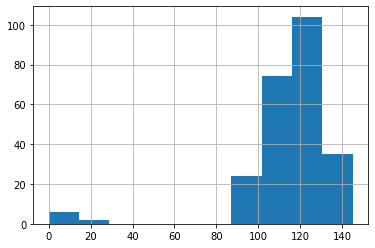

In [112]:
data['Actual'].hist()
plt.show()

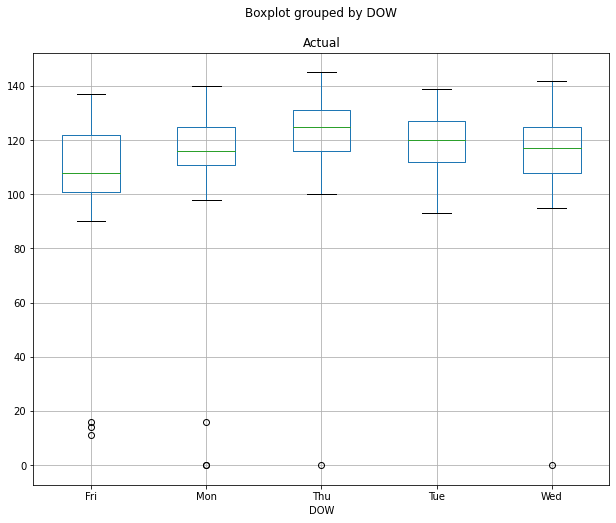

In [113]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['Actual'], by='DOW', ax=ax)
plt.show()

In [114]:
# Frequency for each day!
df.groupby('DOW').count()['Actual']

DOW
Fri    49
Mon    49
Thu    49
Tue    49
Wed    49
Name: Actual, dtype: int64

In [115]:
### ADD MISSING ROW 
''' 
    24-Nov-11 Thu  
    28-May-12 Mon 
    04-Jul-12 Wed 
    03-Sep-12 Mon 
'''

# ADD DIRECTLY in the EXCEL 


' \n    24-Nov-11 Thu  \n    28-May-12 Mon \n    04-Jul-12 Wed \n    03-Sep-12 Mon \n'

In [116]:
df['SurgDate']

0     2011-10-10
1     2011-10-11
2     2011-10-12
3     2011-10-13
4     2011-10-14
         ...    
240   2012-09-10
241   2012-09-11
242   2012-09-12
243   2012-09-13
244   2012-09-14
Name: SurgDate, Length: 245, dtype: datetime64[ns]

In [117]:
# Delete outliers
data_1=df[df['Actual']<80]
data_1

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
33,2011-11-24,Thu,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,2011-11-25,Fri,0,0,1,1,1,1,2,2,2,3,3,3,3,4,7,12,16
54,2011-12-23,Fri,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,14
55,2011-12-26,Mon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,16
59,2011-12-30,Fri,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,6,11
165,2012-05-28,Mon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
192,2012-07-04,Wed,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
235,2012-09-03,Mon,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [118]:
# REMOVE OUTLIERS WITH VALUES OF MEAN
grouped_by_DOW = df.groupby('DOW').agg({'Actual':['mean']})
val_friday = grouped_by_DOW['Actual']['mean'][0]
val_monday = grouped_by_DOW['Actual']['mean'][1]
val_thrusday = grouped_by_DOW['Actual']['mean'][2]
val_wednesday = grouped_by_DOW['Actual']['mean'][4]

In [119]:
import numpy as np
df['Actual'] = np.where( ( (df['Actual'] < 80) & (df['DOW'] == 'Mon' ) ), val_monday, df['Actual'])
df['Actual'] = np.where( ( (df['Actual'] < 80) & (df['DOW'] == 'Fri' ) ), val_friday, df['Actual'])
df['Actual'] = np.where( ( (df['Actual'] < 80) & (df['DOW'] == 'Thu' ) ), val_thrusday, df['Actual'])
df['Actual'] = np.where( ( (df['Actual'] < 80) & (df['DOW'] == 'Wed' ) ), val_wednesday, df['Actual'])

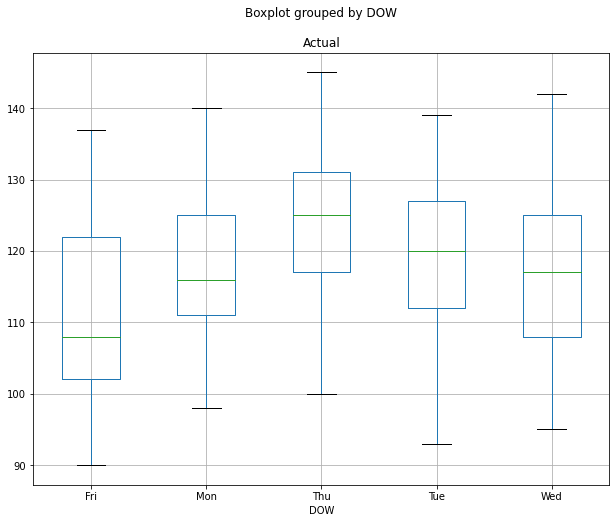

In [120]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['Actual'], by='DOW', ax=ax)
plt.show()

In [121]:
X = df['Actual'].values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=116.261459, mean2=119.468890
variance1=129.888102, variance2=132.349979


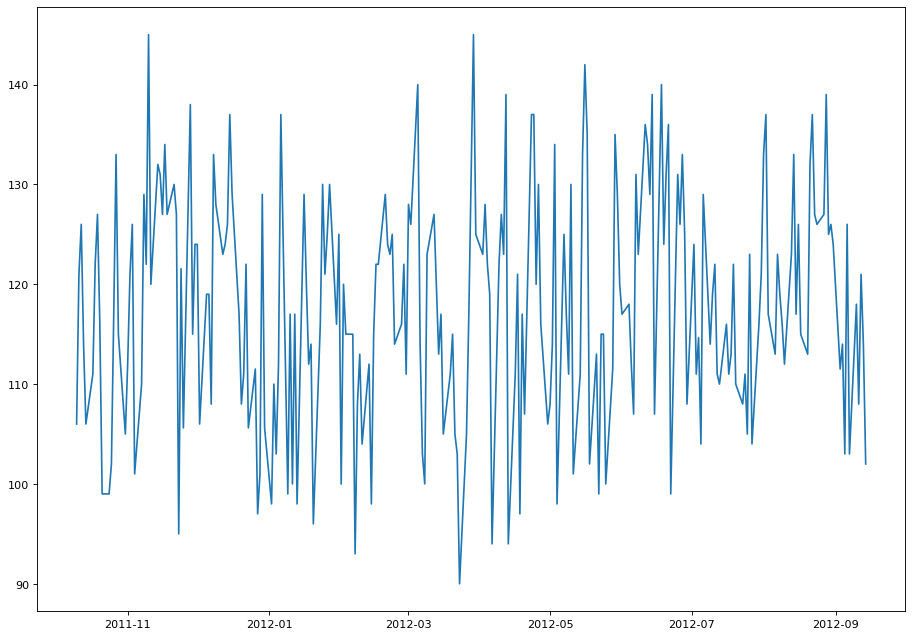

In [122]:
x = df['SurgDate']
y = df['Actual']

from matplotlib.pyplot import figure
figure(figsize=(14, 10), dpi=80)
plt.plot(x,y)
plt.show()

#### FULLER TEST TO CHECK STATIONARY

In [123]:
# Fuller Test
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Actual'],autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test Statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]= value
print(dfoutput)

Test Statistic                  -5.561718
p-value                          0.000002
#lags used                       5.000000
number of observations used    239.000000
critical value (1%)             -3.458011
critical value (5%)             -2.873710
critical value (10%)            -2.573256
dtype: float64


#### PACF and ACF TO GET P AND Q VALUES. D=0 

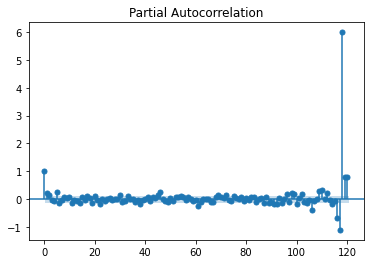

In [124]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_pacf(df['Actual'], lags=120)
plt.show()

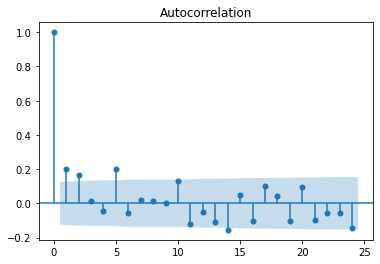

In [125]:
plot_acf(df['Actual'])
plt.show()

In [126]:
df

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106.0
1,2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121.0
2,2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126.0
3,2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114.0
4,2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2012-09-10,Mon,33,49,68,71,82,84,86,86,86,86,91,97,101,103,109,110,118.0
241,2012-09-11,Tue,31,56,68,70,74,78,78,78,78,80,88,94,97,98,98,99,108.0
242,2012-09-12,Wed,39,49,69,78,81,82,82,82,85,88,96,99,99,100,104,115,121.0
243,2012-09-13,Thu,34,51,68,77,75,75,75,79,89,92,98,99,99,97,101,106,114.0


In [127]:
import warnings
warnings.filterwarnings("ignore")

### ARIMA

In [128]:
#Predict future
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df['Actual'][:230]
test = df['Actual'][230:245]

#### EVALUATE THE ARIMA

In [129]:
from sklearn.metrics import r2_score

# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

### HYPER PARAMTER ARMA

In [130]:
from statsmodels.tsa.arima_model import ARIMA

import pmdarima as pm

model = pm.auto_arima(train, start_p=1, start_q=1,
                      max_p=2, max_q=2, # maximum p and q
                      m=52,             # frequency of series
                      d=0,              # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1797.826, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2851.067, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2581.188, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1792.413, Time=0.11 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.12 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1778.594, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1774.543, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1779.819, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1779.198, Time=0.04 sec

Best model:  ARIMA(0,0,2)(0,0,0)[0] intercept
Total fit time: 0.727 seconds
                               SARIMAX Results                                
Dep. Variable:               

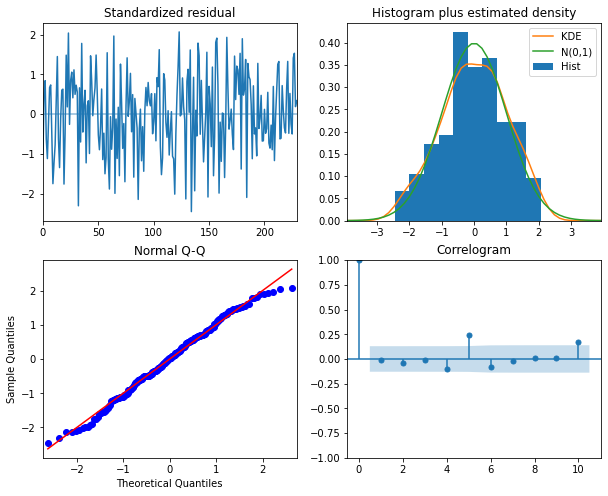

In [131]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

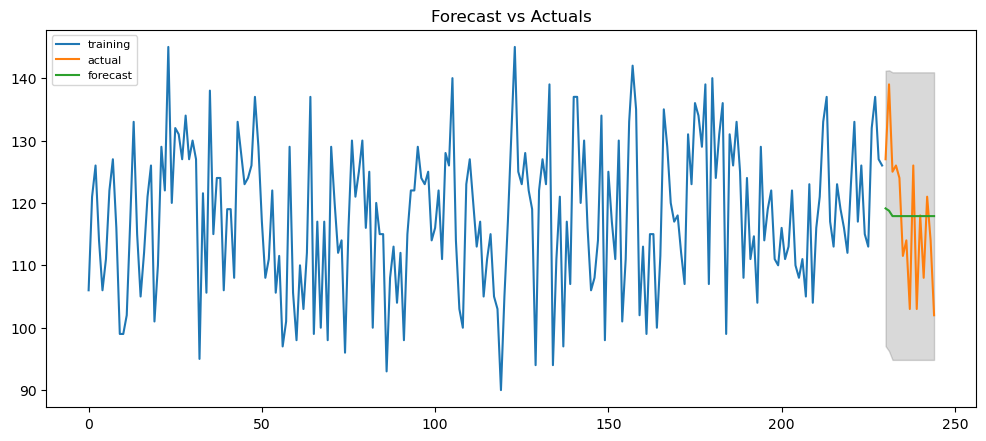

{'mape': 0.07541133032542581,
 'me': 0.5935429013421185,
 'mae': 8.700617225251545,
 'mpe': 0.012830890486354014,
 'rmse': 10.217357858344544,
 'acf1': 0.20062518179059038,
 'corr': 0.537237813876736,
 'minmax': 0.07070965007719565}

In [132]:
# Forecast
n_periods = 15
fc_1, conf = model.predict(n_periods=n_periods, return_conf_int=True)

# Make as pandas series
fc_series = pd.Series(fc_1, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy metrics
forecast_accuracy(fc_1, test)

### **ARMA Model with exogenous variable**

In [133]:
import pmdarima as pm

# SARIMAX Model
sxmodel = pm.auto_arima(train, exogenous=df[['T - 7', 'T - 8', 'T - 9', 'T - 10']][:230],
                      start_p=1, start_q=1,      
                      max_p=3, max_q=3, # maximum p and q
                      m=52,             # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(sxmodel.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1720.131, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2073.562, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2051.428, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1716.259, Time=0.27 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.18 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=1783.833, Time=0.32 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.29 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=1718.871, Time=0.24 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=inf, Time=0.26 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=inf, Time=0.32 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1703.839, Time=0.30 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1708.282, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1756.404, Time=0.26 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=1774.483, Time=0

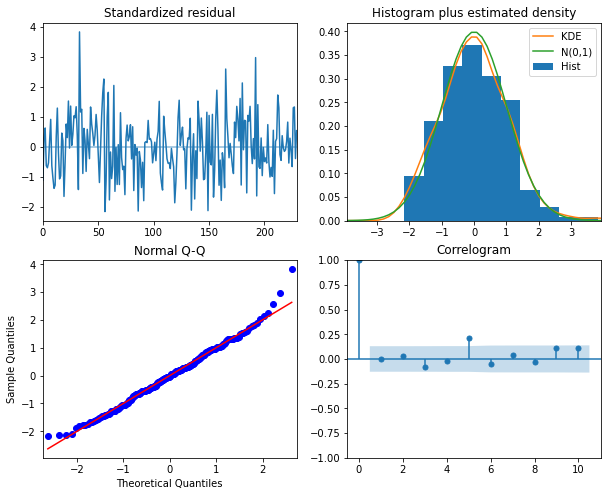

In [134]:
sxmodel.plot_diagnostics(figsize=(10,8))
plt.show()

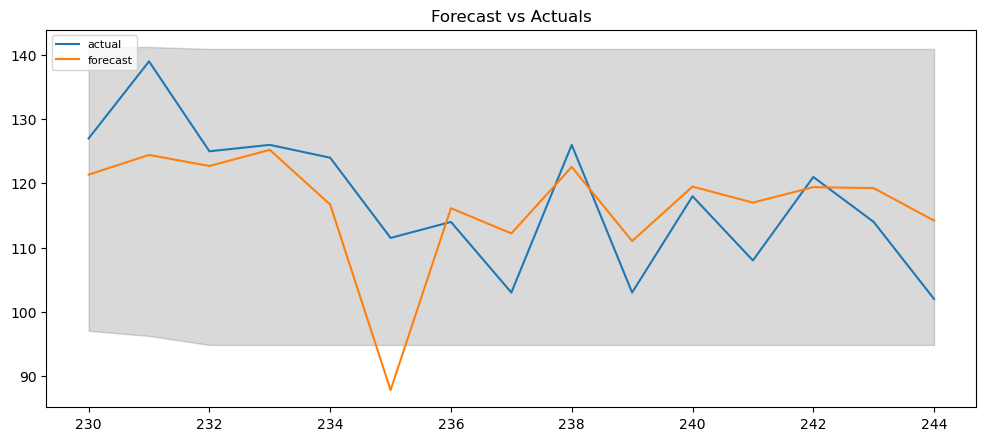

{'mape': 0.06222195510419069,
 'me': -0.7960097406009036,
 'mae': 7.108260329558168,
 'mpe': -0.002494318959653738,
 'rmse': 9.283746686219228,
 'acf1': 0.20062518179059038,
 'corr': 0.5432236554692943,
 'minmax': 0.05990796853159541}

In [135]:
# Forecast
n_periods = 15
fc, confint = sxmodel.predict(n_periods=n_periods, exogenous=df[['T - 7', 'T - 8', 'T - 9', 'T - 10']][230:245], return_conf_int=True)

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)

plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series,
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy metrics
forecast_accuracy(fc, test)

In [103]:
test = test.astype(int).reset_index(drop = True)

In [104]:
forecast = pd.DataFrame(fc)
forecast = forecast.astype(int)
forecast.columns = ['T-1 _ T-6']
forecast['Actual'] = test
forecast['Baseline'] = pd.DataFrame(fc_1.astype(int))

In [99]:
forecast

,T-1 _ T-6,Actual,Baseline
0,122,127,119
1,126,139,118
2,122,125,117
3,125,126,117
4,116,124,117
5,86,111,117
6,115,114,117
7,114,103,117
8,123,126,117
9,112,103,117
